In [4]:
# Modules
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Setup environment and update dictionary
!source setup_project.sh

# Set options
pd.set_option("display.max_rows", 200)

Rebel manifesto dictionary updated.


In [5]:
# Load rebel manifesto data
manifesto_dictionary = pd.read_pickle('../data/manifesto_dictionary.pkl')
manifesto_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 906 to 1444
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        1445 non-null   object        
 1   group          1445 non-null   object        
 2   date           1334 non-null   datetime64[ns]
 3   year           1334 non-null   period[A-DEC] 
 4   source_type    1445 non-null   object        
 5   document_type  1437 non-null   object        
 6   description    1419 non-null   object        
 7   author         85 non-null     object        
 8   language       1445 non-null   object        
 9   file_path      1445 non-null   object        
 10  file_name      1445 non-null   object        
 11  file_type      1445 non-null   object        
dtypes: datetime64[ns](1), object(10), period[A-DEC](1)
memory usage: 146.8+ KB


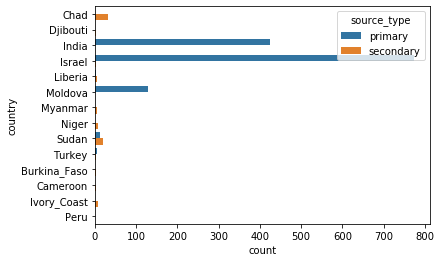

In [6]:
# Exploratory plots
blue = sns.color_palette('tab10')[0]
orange = sns.color_palette('tab10')[1]

# Sources by country
sns.countplot(y='country', hue='source_type', data=manifesto_dictionary)

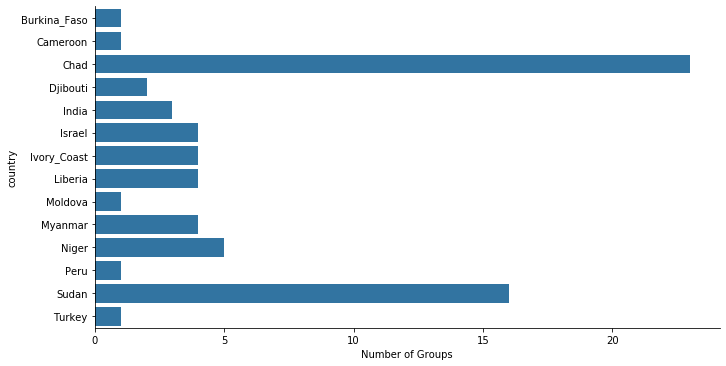

In [7]:
# Number of groups by country
cgs_counts = manifesto_dictionary.groupby(['country'])['group'].nunique()
cgs_counts = cgs_counts.to_frame(name='Number of Groups').reset_index()
sns.catplot(x='Number of Groups', y='country', data=cgs_counts,
            kind='bar', color=blue, aspect=2)

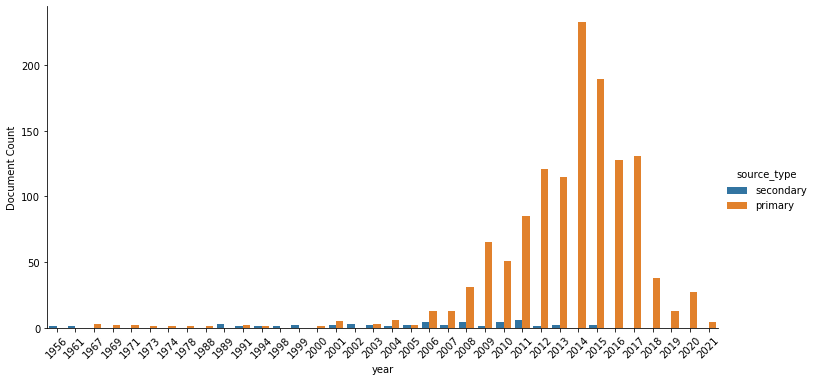

In [8]:
sy_counts = manifesto_dictionary.groupby(['year'])['source_type'].value_counts()
sy_counts = sy_counts.to_frame(name='Document Count').reset_index()
g = sns.catplot(x='year', y='Document Count', hue='source_type', 
                kind='bar', data=sy_counts, aspect=2)
g.set_xticklabels(rotation=45)

In [9]:
# Examine language and primary counts for subset of groups
is_primary = manifesto_dictionary['source_type'] == 'primary'
manifesto_dictionary[is_primary]

,country,group,date,year,source_type,document_type,description,author,language,file_path,file_name,file_type
906,Chad,CNR,2005-11-30,2005,primary,interview,NaN,NaN,EN,Chad/CNR/primary/None_interview_2005-11-30.docx,None_interview_2005-11-30.docx,docx
1344,Djibouti,FRUD-AD,2001-05-12,2001,primary,agreement,AgreementForReformCivilConcord,NaN,EN,Djibouti/FRUD-AD/primary/AgreementForReformCiv...,AgreementForReformCivilConcord_agreement_2001-...,pdf
908,India,CPI-Maoist,2019-07-24,2019,primary,Statement,MsgOn50thAnniversaryOfParty,NaN,EN,India/CPI-Maoist/primary/MsgOn50thAnniversaryO...,MsgOn50thAnniversaryOfParty_Statement_2019-07-...,pdf
909,India,CPI-Maoist,2018-12-28,2018,primary,NewsReport,MaoistsInKeralaShunMobilePhones,NaN,EN,India/CPI-Maoist/primary/MaoistsInKeralaShunMo...,MaoistsInKeralaShunMobilePhones_NewsReport_201...,pdf
910,India,CPI-Maoist,2010-06-01,2010,primary,Statement,JnaneswariExpress,NaN,EN,India/CPI-Maoist/primary/JnaneswariExpress_Sta...,JnaneswariExpress_Statement_2010-06-01.pdf,pdf
...,...,...,...,...,...,...,...,...,...,...,...,...
1345,Turkey,PKK,NaT,NaT,primary,chronology,Chronology,NaN,TR,Turkey/PKK/primary/Chronology_chronology_[TR].pdf,Chronology_chronology_[TR].pdf,pdf
1346,Turkey,PKK,NaT,NaT,primary,manifesto,Manifesto,NaN,TR,Turkey/PKK/primary/Manifesto_manifesto_[TR].pdf,Manifesto_manifesto_[TR].pdf,pdf
1347,Turkey,PKK,NaT,NaT,primary,article,4.1,NaN,TR,Turkey/PKK/primary/4.1_article_[TR].pdf,4.1_article_[TR].pdf,pdf
1348,Turkey,PKK,1991-05-15,1991,primary,article,Kongre,NaN,TR,Turkey/PKK/primary/Kongre_article_[TR]_1991-05...,Kongre_article_[TR]_1991-05-15.pdf,pdf


In [10]:
groups = manifesto_dictionary['group'].isin(['CPI-Maoist', 'PFLP', 'PMR', 'JEM'])
manifesto_dictionary[is_primary & groups]

,country,group,date,year,source_type,document_type,description,author,language,file_path,file_name,file_type
908,India,CPI-Maoist,2019-07-24,2019,primary,Statement,MsgOn50thAnniversaryOfParty,NaN,EN,India/CPI-Maoist/primary/MsgOn50thAnniversaryO...,MsgOn50thAnniversaryOfParty_Statement_2019-07-...,pdf
909,India,CPI-Maoist,2018-12-28,2018,primary,NewsReport,MaoistsInKeralaShunMobilePhones,NaN,EN,India/CPI-Maoist/primary/MaoistsInKeralaShunMo...,MaoistsInKeralaShunMobilePhones_NewsReport_201...,pdf
910,India,CPI-Maoist,2010-06-01,2010,primary,Statement,JnaneswariExpress,NaN,EN,India/CPI-Maoist/primary/JnaneswariExpress_Sta...,JnaneswariExpress_Statement_2010-06-01.pdf,pdf
911,India,CPI-Maoist,2017-06-17,2017,primary,Statement,AppealToRightsActivists,NaN,EN,India/CPI-Maoist/primary/AppealToRightsActivis...,AppealToRightsActivists_Statement_2017-06-17.txt,txt
912,India,CPI-Maoist,2012-01-13,2012,primary,Statement,OnKishenjisMartyrdom,NaN,EN,India/CPI-Maoist/primary/OnKishenjisMartyrdom_...,OnKishenjisMartyrdom_Statement_2012-01-13.txt,txt
...,...,...,...,...,...,...,...,...,...,...,...,...
126,Moldova,PMR,2012-09-27,2012,primary,statement,CommentbyMinistryofForeignAffairsofthePMR,NaN,EN,Moldova/PMR/primary/CommentbyMinistryofForeign...,CommentbyMinistryofForeignAffairsofthePMR_stat...,txt
127,Moldova,PMR,2019-08-16,2019,primary,statement,OfficialMessage,NaN,EN,Moldova/PMR/primary/OfficialMessage_statement_...,OfficialMessage_statement_2019-08-16.txt,txt
1332,Sudan,JEM,2014-07-31,2014,primary,about,About,NaN,EN,Sudan/JEM/primary/About_about_2014-07-31.pdf,About_about_2014-07-31.pdf,pdf
1333,Sudan,JEM,NaT,NaT,primary,charter,TheNewDawnCharter,NaN,EN,Sudan/JEM/primary/TheNewDawnCharter_charter.pdf,TheNewDawnCharter_charter.pdf,pdf
